In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
os.chdir(r"C:\Users\super\Downloads\FlightWeather_new")
data=pd.read_csv('Module2ext.csv')

In [3]:
data.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Unnamed: 0_x         int64
Year                 int64
Quarter              int64
Month                int64
DayofMonth           int64
FlightDate          object
DepTime            float64
DepDel15           float64
Origin              object
Dest                object
CRSDepTime           int64
DepDelayMinutes    float64
OriginAirportID      int64
DestAirportID        int64
ArrTime            float64
CRSArrTime           int64
ArrDel15           float64
ArrDelayMinutes    float64
ArrivalDate         object
ArrTime1             int64
DepTime1             int64
Unnamed: 0_y         int64
windspeedKmph_x      int64
DewPointF_x          int64
cloudcover_x         int64
precipMM_x         float64
pressure_x           int64
WindGustKmph_x       int64
visibility_x         int64
weatherCode_x        int64
tempF_x              int64
WindChillF_x         int64
winddirDegree_x      int64
humidity_x           int64
time_x               int64
A

In [4]:
data=data.loc[data['PredDelay'] == 1]

In [5]:
from matplotlib import cm
feature_names = data.drop(['ArrDel15','DepDel15','Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1','Date_x','Date_y','FlightDate','ArrivalDate','Airport_x','Airport_y','Origin','Dest','DepTime','ArrTime','ArrDelayMinutes','ArrTime1','DepTime1','DepDelayMinutes'],axis=1)
X = feature_names
y = data['ArrDelayMinutes']
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=random_state)

In [6]:
feature_names.columns.tolist()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'CRSDepTime',
 'OriginAirportID',
 'DestAirportID',
 'CRSArrTime',
 'windspeedKmph_x',
 'DewPointF_x',
 'cloudcover_x',
 'precipMM_x',
 'pressure_x',
 'WindGustKmph_x',
 'visibility_x',
 'weatherCode_x',
 'tempF_x',
 'WindChillF_x',
 'winddirDegree_x',
 'humidity_x',
 'time_x',
 'Unnamed: 0.1.1',
 'windspeedKmph_y',
 'DewPointF_y',
 'cloudcover_y',
 'precipMM_y',
 'pressure_y',
 'WindGustKmph_y',
 'visibility_y',
 'weatherCode_y',
 'tempF_y',
 'WindChillF_y',
 'winddirDegree_y',
 'humidity_y',
 'time_y',
 'PredDelay']

In [ ]:
# FOR EXTRA TREES CLASSIFIER
  *LINEAR REGRESSOR
  *EXTRATREES REGRESSOR
  *XGB REGRESSOR

In [30]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred = reg.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Explained variance score: 1 is perfect prediction
print("R2 score: ",r2_score(y_test,y_pred,multioutput='variance_weighted'))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:  ",mean_absolute_error(y_test, y_pred))

R2 score:  0.9291891810746635
RMSE:  19.79368937741836
MAE:   14.447553459124764


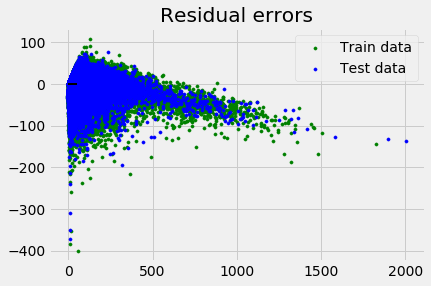

In [34]:
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [27]:
y_test.min()

0.0

In [36]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features=0.3, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Explained variance score: 1 is perfect prediction
print("R2 score: ",r2_score(y_test,y_pred,multioutput='variance_weighted'))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:  ",mean_absolute_error(y_test, y_pred))

R2 score:  0.7509974748062865
RMSE:  37.11750859637192
MAE:   26.959506212869748


In [39]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Explained variance score: 1 is perfect prediction
print("R2 score: ",r2_score(y_test,y_pred,multioutput='variance_weighted'))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:  ",mean_absolute_error(y_test, y_pred))

R2 score:  0.944888829037992
RMSE:  17.462111679305632
MAE:   11.932601067547822


In [ ]:
# FOR XGBoost CLASSIFIER
  *LINEAR REGRESSOR
  *EXTRATREES REGRESSOR
  *XGB REGRESSOR

In [7]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_pred = reg.predict(X_test)

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Explained variance score: 1 is perfect prediction
print("R2 score: ",r2_score(y_test,y_pred,multioutput='variance_weighted'))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:  ",mean_absolute_error(y_test, y_pred))

R2 score:  0.030597038469079685
RMSE:  70.7736126316941
MAE:   43.44156395505855


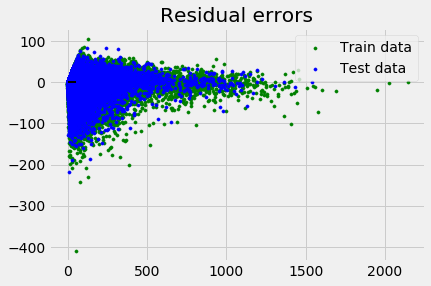

In [9]:
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [10]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_jobs=-1)
model.fit(X_train, y_train)

C:\Users\super\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Explained variance score: 1 is perfect prediction
print("R2 score: ",r2_score(y_test,y_pred,multioutput='variance_weighted'))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:  ",mean_absolute_error(y_test, y_pred))

R2 score:  -0.12056235734399957
RMSE:  76.09168620440623
MAE:   46.27901362698189


In [13]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Explained variance score: 1 is perfect prediction
print("R2 score: ",r2_score(y_test,y_pred,multioutput='variance_weighted'))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:  ",mean_absolute_error(y_test, y_pred))

R2 score:  0.05154828448533777
RMSE:  70.00463681288026
MAE:   42.75454621999905


In [11]:
print(xgb.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ext.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

AttributeError: module 'xgboost' has no attribute 'feature_importances_'